In [ ]:
#C1
# Importar librerias

import numpy as np
import matplotlib.pyplot as plt
import time

import keras


# Librerias para la red convolucional
from keras.models import *
from keras.layers import *
from keras.optimizers import *

# Librerias para cargar imagenes

from PIL import Image
import glob

In [ ]:
# C2
# Cargar la base de datos

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

from PIL import Image
import glob
import numpy as np
import os
#cargar ka base de datos, directorio dependiente de cada persona
dir_img='/content/drive/MyDrive/baches_images'
dir_lab='/content/drive/MyDrive/baches_label'

image_list=[]
label_list=[]
background_color= np.array([255,0,255])#solo el magenta
for filename in glob.glob('/content/drive/MyDrive/baches_images/*.png'):
    im = Image.open(filename)
    image_list.append(np.asarray(im))

    # Construir la ruta de la etiqueta
    filename1 = os.path.basename(filename).replace('images', 'labels')
    filename2 = filename1.replace('bache_', 'label_bache_')
    label_path = os.path.join(dir_lab, filename2)

    # Cargar la etiqueta solo si el archivo existe
    if os.path.exists(label_path):
        la = Image.open(label_path)
        gt_image = np.asarray(la)
        gt_bg = np.all(gt_image == background_color, axis=2)
        label_list.append(np.expand_dims(gt_bg, axis=2))
    else:
        print(f"El archivo de etiqueta no existe: {label_path}")

# Imprimir el conteo de imágenes y etiquetas
print('Total de imagenes:', len(image_list))
print('Total de label:', len(label_list))

Total de imagenes: 178
Total de label: 178


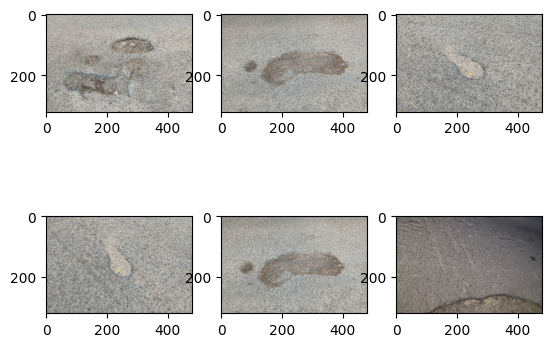

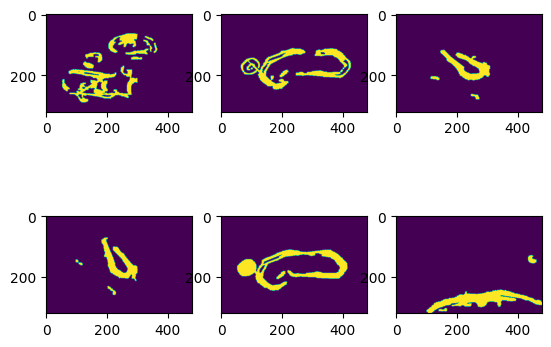

142
36
142
36


In [ ]:
# C3
# Visualizar y acomodar los datos

# Visualizar los datos
fig = plt.figure()
for i in range (0,6):
  a = fig.add_subplot(2,3,i+1)
  plt.imshow(image_list[i])
plt.show()

fig1 = plt.figure()
for j in range (0,6):
  b = fig1.add_subplot(2,3,j+1)
  plt.imshow(label_list[j][:,:,0])
plt.show()


# Separar los datos en conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.20, random_state=40)  # Se requiere el 75% para entrenamiento


print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
# C4
# Modelo reducido

# Modelo: U-Net-B
input_size = (320,480,3)

def unetB(input_size = (320,480,3)):

    inputs = Input(input_size)
    s = Lambda(lambda x: x / 255) (inputs)

    conv1 = Conv2D(64, (3, 3), padding='same', activation='relu')(s)
    conv2 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), padding='same', activation='relu')(pool1)
    conv4 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, (3, 3), padding='same', activation='relu')(pool2)
    conv6 = Conv2D(256, (3, 3), padding='same', activation='relu')(conv5)


    convT3 = Conv2D(128, (2, 2), padding='same', activation='relu')(UpSampling2D(size=(2, 2))(conv6))
    merge3 = concatenate([convT3, conv4], axis=3)
    conv15 = Conv2D(128, (3, 3), padding='same', activation='relu')(merge3)
    conv16 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv15)

    convT4 = Conv2D(64, (2, 2), padding='same', activation='relu')(UpSampling2D(size=(2, 2))(conv16))
    merge4 = concatenate([convT4, conv2], axis=3)
    conv17 = Conv2D(64, (3, 3), padding='same', activation='relu')(merge4)
    conv18 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv17)


    y = Conv2D(1, (1, 1), activation='sigmoid')(conv18)

    return Model(inputs=inputs, outputs=y)

model = unetB(input_size)

model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 320, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 320, 480, 64  1792        ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# C5
# Entrenar el modelo

log=model.fit(x=np.array(X_train)
          ,y=np.array(y_train)
          ,epochs=50      # Definir el numero de epocas para el entrenamiento
          ,batch_size=2
          ,validation_data=(np.array(X_test),np.array(y_test)))

Epoch 1/50
71/71 [==============================] - 32s 198ms/step - loss: 0.6920 - accuracy: 0.4955 - val_loss: 0.5809 - val_accuracy: 0.9049
Epoch 2/50
71/71 [==============================] - 14s 196ms/step - loss: 0.3729 - accuracy: 0.9123 - val_loss: 0.3247 - val_accuracy: 0.9049
Epoch 3/50
71/71 [==============================] - 14s 202ms/step - loss: 0.3057 - accuracy: 0.9123 - val_loss: 0.3225 - val_accuracy: 0.9049
Epoch 4/50
71/71 [==============================] - 14s 204ms/step - loss: 0.3034 - accuracy: 0.9123 - val_loss: 0.3207 - val_accuracy: 0.9049
Epoch 5/50
71/71 [==============================] - 14s 203ms/step - loss: 0.3014 - accuracy: 0.9123 - val_loss: 0.3184 - val_accuracy: 0.9049
Epoch 6/50
71/71 [==============================] - 15s 209ms/step - loss: 0.2985 - accuracy: 0.9123 - val_loss: 0.3214 - val_accuracy: 0.9049
Epoch 7/50
71/71 [==============================] - 15s 207ms/step - loss: 0.2981 - accuracy: 0.9123 - val_loss: 0.3164 - val_accuracy: 0.9049

1/1 [==============================] - 0s 29ms/step
Tiempo de ejecucion:  0.13318157196044922


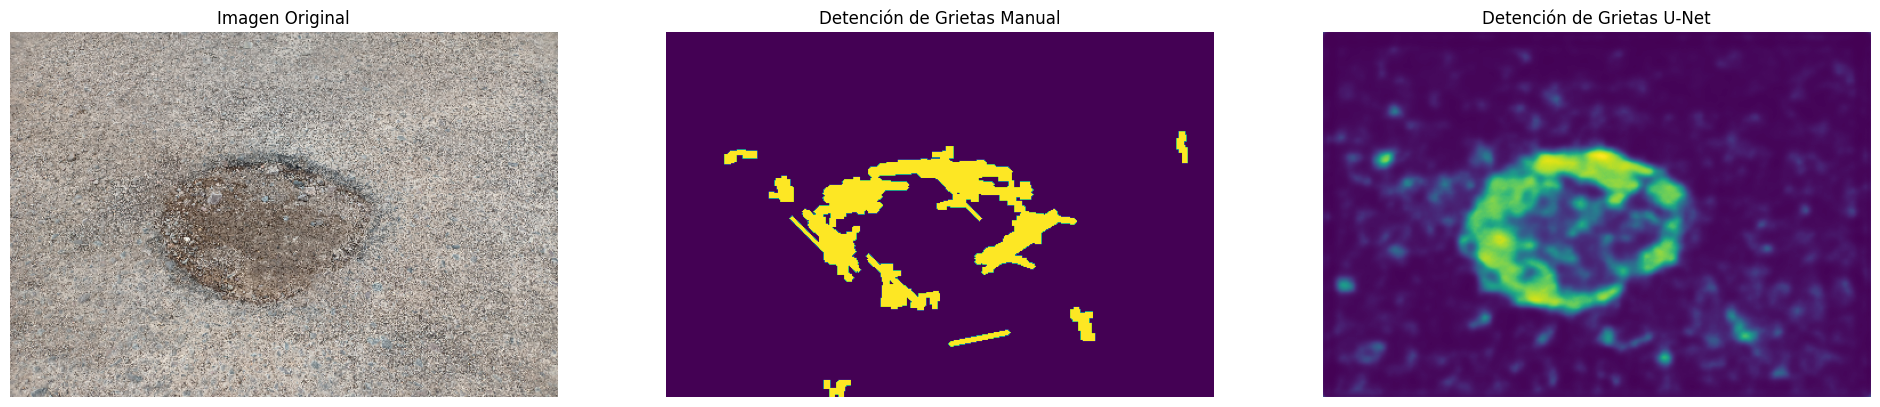

In [ ]:
# C6
# Probar el modelo con una sola imagen

t_l = y_test [22]
t1 = t_l[:,:,0]


inicio = time.time()
pred = model.predict(np.expand_dims(X_test[22],axis=0))
fin = time.time()
print ('Tiempo de ejecucion: ', fin-inicio)

plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.imshow(X_test[22])
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(t1)
plt.title('Detención de Grietas Manual')
plt.axis('off')

plt.subplot(133)
plt.imshow(pred[0,:,:,0])
plt.title('Detención de Grietas U-Net')
plt.axis('off')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

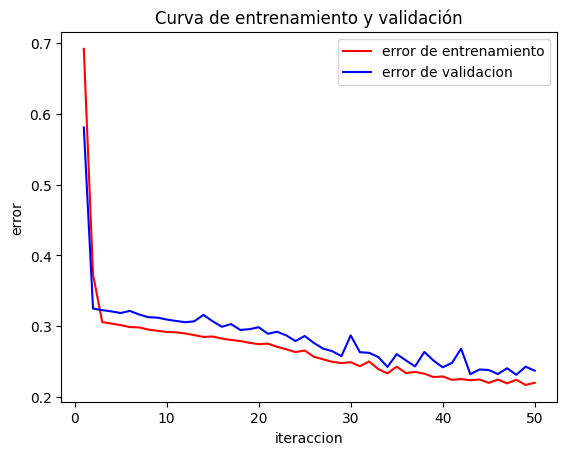

In [ ]:
error=log.history['loss']
val_error=log.history['val_loss']
epochs=range(1,len(error)+1)
plt.plot(epochs,error,color='red',label='error de entrenamiento')
plt.plot(epochs,val_error,color='blue',label='error de validacion')
plt.title('Curva de entrenamiento y validación')
plt.xlabel('iteraccion')
plt.ylabel('error')
plt.legend()
plt.show

2/2 [==============================] - 24s 4s/step
True Positives: 111877 ( 21.26967469148829 %)
False Positives: 44389 ( 0.887140017191598 %)
True Negatives: 4959218 ( 99.1128599828084 %)
False Negatives: 414116 ( 78.73032530851171 %)
Precision: 0.7159394877964497
Recall: 0.2126967469148829


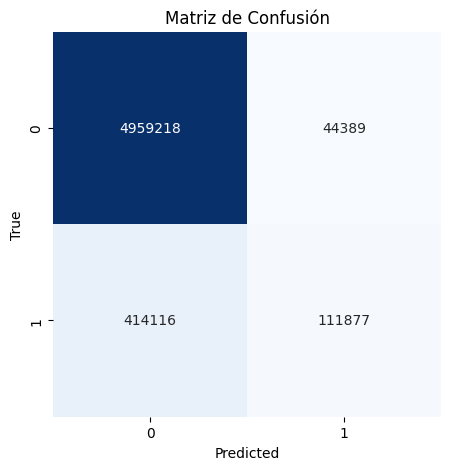

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(np.array(X_test))

# Redondear las predicciones a 0 o 1 (ya que es un problema de clasificación binaria)
y_pred_binary = np.round(y_pred).ravel()

# Convertir las etiquetas del conjunto de prueba a formato binario
y_test_binary = np.round(y_test).ravel()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Calcular los valores de interés
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calcular precision y recall
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

# Calcular porcentajes
total_samples = len(y_test_binary)
total_positives = true_positive + false_negative
total_negatives = true_negative + false_positive

percent_true_positive = (true_positive / total_positives) * 100
percent_false_positive = (false_positive / total_negatives) * 100
percent_true_negative = (true_negative / total_negatives) * 100
percent_false_negative = (false_negative / total_positives) * 100

# Mostrar los valores en la consola
print("True Positives:", true_positive, "(", percent_true_positive, "%)")
print("False Positives:", false_positive, "(", percent_false_positive, "%)")
print("True Negatives:", true_negative, "(", percent_true_negative, "%)")
print("False Negatives:", false_negative, "(", percent_false_negative, "%)")

print("Precision:", precision)
print("Recall:", recall)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
